#Import data

In [ ]:
import pandas as pd
df = pd.read_excel('/content/adaKami-reviews.xlsx')
df.head()

,Unnamed: 0,date,review,rating,isEdited,userName,title
0,0,2020-08-31 01:32:47,"Udah bunga gede, belom jatuh tempo udah dikata...",1,False,dodol !!,Jangan pinjam di sini. Mending gadai barang. S...
1,1,2020-02-07 07:52:55,Jatuh tempo tgl 26 belum ada telat sama sekali...,1,False,bruno-dos,Belum jatuh tempo
2,2,2022-08-06 06:31:01,Penyebaran Data Pribadi seperti Informasi Elek...,1,False,dewi nur atikah,Jangan Pinjem disini 馃槉
3,3,2020-02-28 14:30:26,Baru juga daftar pas minta naikin limit melalu...,1,False,tiarsyifa,Sebar data ya ?
4,4,2021-06-05 05:39:20,sudah tidak lagi pake aplikasi ini.. barusan s...,1,False,Ayiie8,馃槫


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

#regex

In [ ]:
def remove_punctuation(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Stopword

In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def remove_stopwords(text):
    if isinstance(text, str):
        return stopword.remove(text.lower())
    return text

df['review'] = df['review'].apply(lambda x: remove_stopwords(remove_punctuation(x)) if isinstance(x, str) else x)
df.head()

,Unnamed: 0,date,review,rating,isEdited,userName,title
0,0,2020-08-31 01:32:47,udah bunga gede belom jatuh tempo udah dikatai...,1,False,dodol !!,Jangan pinjam di sini. Mending gadai barang. S...
1,1,2020-02-07 07:52:55,jatuh tempo tgl telat sama sekali sudah ada p...,1,False,bruno-dos,Belum jatuh tempo
2,2,2022-08-06 06:31:01,penyebaran data pribadi informasi elektronik d...,1,False,dewi nur atikah,Jangan Pinjem disini 馃槉
3,3,2020-02-28 14:30:26,baru daftar pas minta naikin limit melalui apl...,1,False,tiarsyifa,Sebar data ya ?
4,4,2021-06-05 05:39:20,pake aplikasi barusan seumurumur pake aplikasi...,1,False,Ayiie8,馃槫


#most common

Most common words:
aplikasi: 617
nya: 471
yg: 469
bayar: 407
ga: 406
mau: 391
jangan: 342
aja: 335
udah: 324
telat: 312


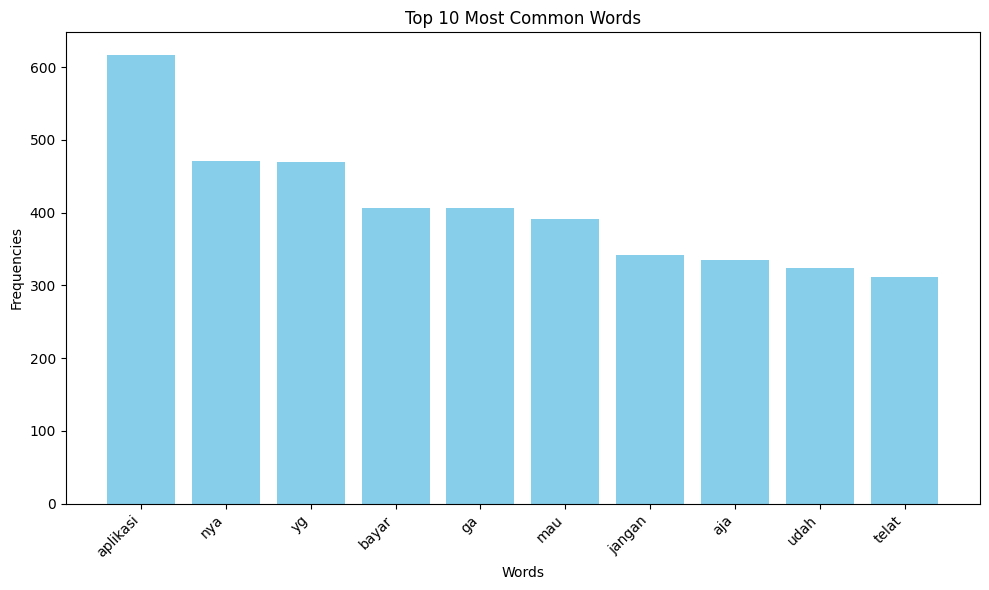

In [ ]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize

all_text = ' '.join(df['review'])

tokens = word_tokenize(all_text)

word_frequencies = Counter(tokens)
most_common_words = word_frequencies.most_common(10)
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")
words = [word for word, freq in most_common_words]
frequencies = [freq for word, freq in most_common_words]

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
unwanted_words = ['yg', 'nya', 'ga','jadi','aja','bukan','apa','sama','jg','si','tp','dr',
                  'mau',"sama","lu","et","gak","di"]
def lemmatize_and_remove_unwanted(text):
    if isinstance(text, str):
        text = text.lower()
        words = word_tokenize(text)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        cleaned_text = ' '.join([word for word in lemmatized_words if word not in unwanted_words])
        return cleaned_text
    return text

df['review'] = df['review'].apply(lambda x: lemmatize_and_remove_unwanted(x) if isinstance(x, str) else x)
df.head()


,Unnamed: 0,date,review,rating,isEdited,userName,title
0,0,2020-08-31 01:32:47,udah bunga gede belom jatuh tempo udah dikatai...,1,False,dodol !!,Jangan pinjam di sini. Mending gadai barang. S...
1,1,2020-02-07 07:52:55,jatuh tempo tgl telat sekali sudah ada penagih...,1,False,bruno-dos,Belum jatuh tempo
2,2,2022-08-06 06:31:01,penyebaran data pribadi informasi elektronik d...,1,False,dewi nur atikah,Jangan Pinjem disini 馃槉
3,3,2020-02-28 14:30:26,baru daftar pa minta naikin limit melalui apli...,1,False,tiarsyifa,Sebar data ya ?
4,4,2021-06-05 05:39:20,pake aplikasi barusan seumurumur pake aplikasi...,1,False,Ayiie8,馃槫


In [ ]:
# Wordcloud semua

Most common words:
aplikasi: 617
bayar: 407
jangan: 342
udah: 324
telat: 312
data: 303
bunga: 288
tempo: 264
pinjaman: 247
pinjam: 244


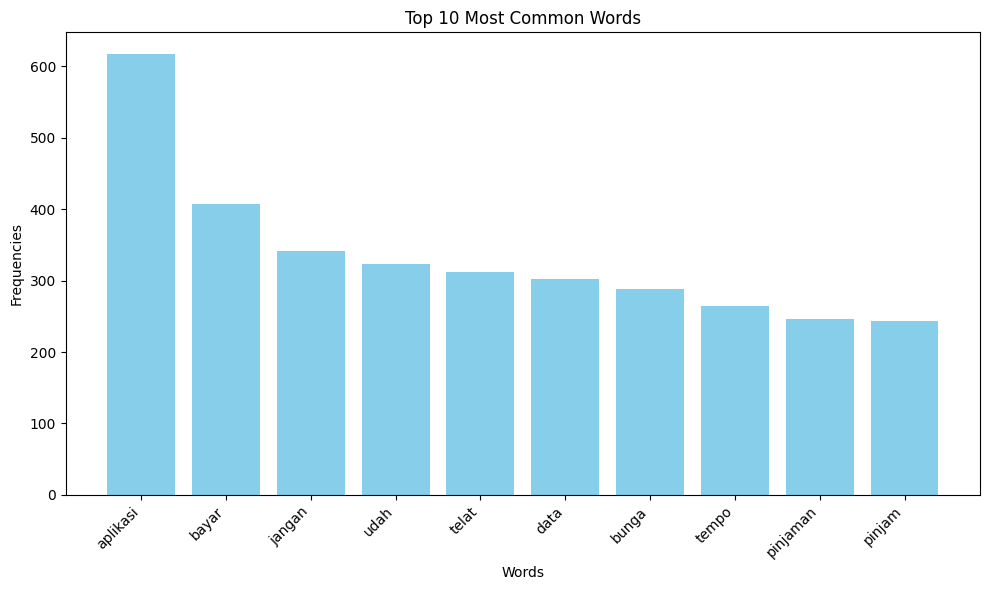

In [ ]:
all_text = ' '.join(df['review'])

tokens = word_tokenize(all_text)

word_frequencies = Counter(tokens)
most_common_words = word_frequencies.most_common(10)
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")
words = [word for word, freq in most_common_words]
frequencies = [freq for word, freq in most_common_words]

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Wordcloud

In [ ]:
pip install wordcloud matplotlib

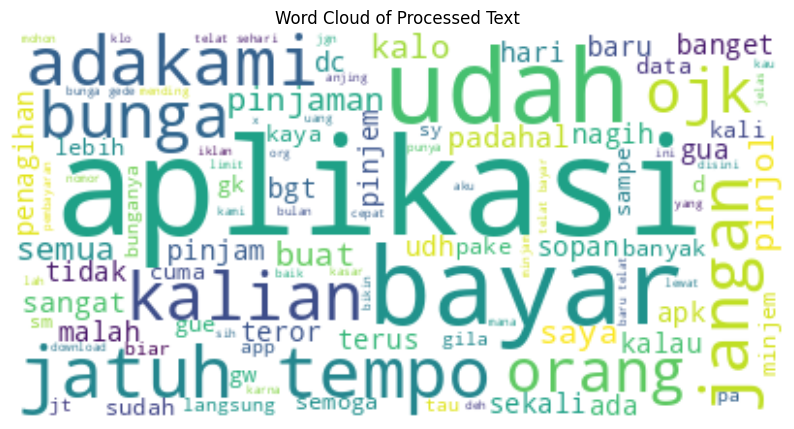

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Text')
plt.show()

# WORD2VEC

In [ ]:
import gensim
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df['review'] = df['review'].apply(lambda x: gensim.utils.simple_preprocess(x))

word2vec_model = gensim.models.Word2Vec(sentences=df['review'], vector_size=100, window=5, min_count=2, workers=4)
word2vec_model.train(df['review'], total_examples=len(df['review']), epochs=10)

def document_vector(doc):
    valid_words = [word for word in doc if word in word2vec_model.wv]
    if valid_words:
        return np.mean(word2vec_model.wv[valid_words], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

doc_vectors = df['review'].apply(document_vector)

doc_vectors_matrix = np.vstack(doc_vectors)


#Elbow Method

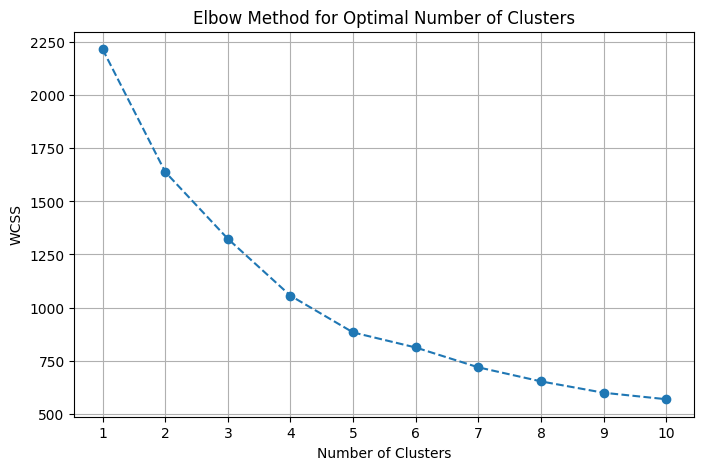

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def calculate_wcss(data):
    wcss = []
    for n_clusters in range(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

wcss = calculate_wcss(doc_vectors_matrix)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#Kmeans

Silhouette Score: 0.3677012344240395


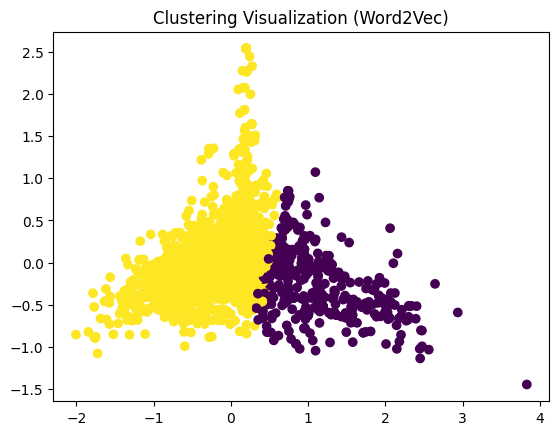

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(doc_vectors_matrix)

clusters = kmeans_model.predict(doc_vectors_matrix)

silhouette_avg = silhouette_score(doc_vectors_matrix, clusters)
print(f'Silhouette Score: {silhouette_avg}')

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(doc_vectors_matrix)

plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clustering Visualization (Word2Vec)')
plt.show()

# Kmeans++

In [ ]:
from sklearn import cluster
k = 2
seed = 99
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state=seed)
kmPP.fit(doc_vectors_matrix)
C_kmpp = kmPP.predict(doc_vectors_matrix)
silhouette_avg = silhouette_score(doc_vectors_matrix, C_kmpp)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.31


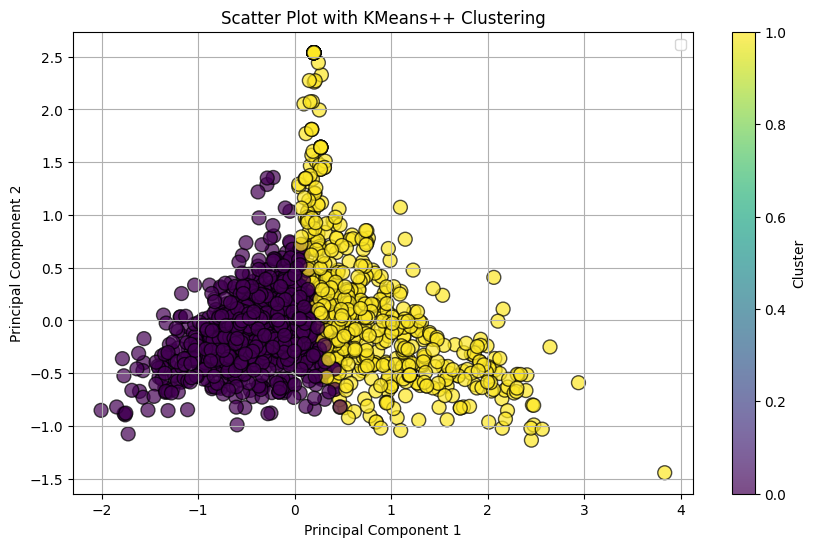

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_vectors_matrix)

feature_1 = X_pca[:, 0]
feature_2 = X_pca[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(feature_1, feature_2, c=C_kmpp, cmap='viridis', marker='o', edgecolor='k', alpha=0.7, s=100)

plt.title('Scatter Plot with KMeans++ Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# DBSCAN

Silhouette Score (DBSCAN): 0.4000935119834468


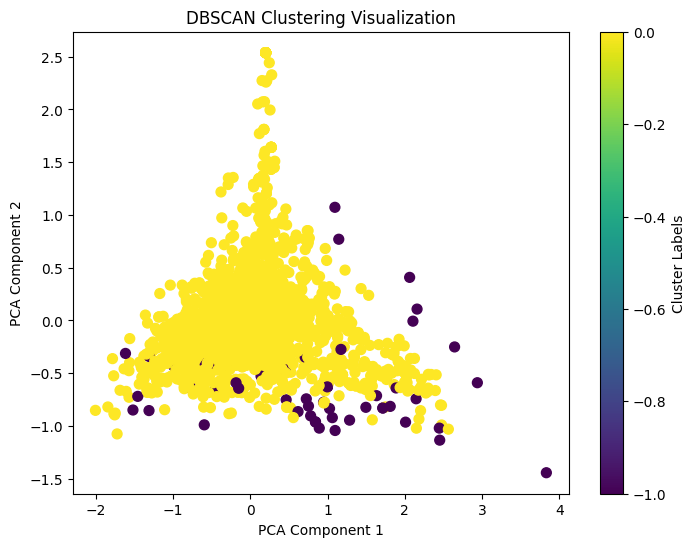

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(doc_vectors_matrix)
dbscan_clusters = dbscan_model.labels_

silhouette_avg = silhouette_score(doc_vectors_matrix, dbscan_clusters)
print(f'Silhouette Score (DBSCAN): {silhouette_avg}')

plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=dbscan_clusters, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Labels')
plt.show()

# Menshift

Silhouette Score (Mean Shift): 0.5151780199473298


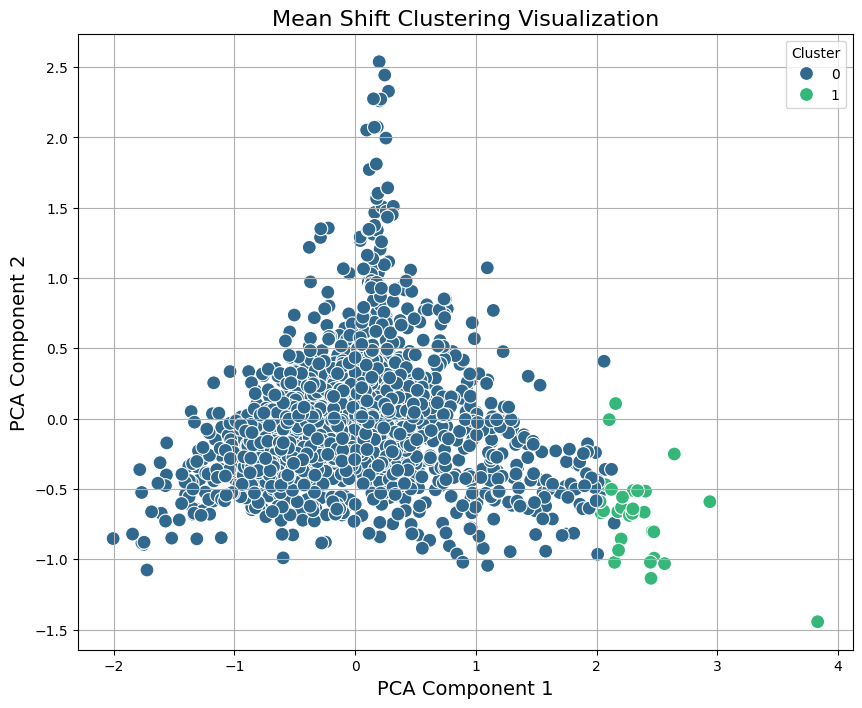

In [ ]:
from sklearn.cluster import MeanShift
import seaborn as sns

mean_shift_model = MeanShift()

mean_shift_model.fit(doc_vectors_matrix)

mean_shift_clusters = mean_shift_model.labels_

silhouette_avg = silhouette_score(doc_vectors_matrix, mean_shift_clusters)
print(f'Silhouette Score (Mean Shift): {silhouette_avg}')

plt.figure(figsize=(10, 8))
sns.scatterplot(x=doc_vectors_2d[:, 0], y=doc_vectors_2d[:, 1], hue=mean_shift_clusters, palette='viridis', s=100)

plt.title('Mean Shift Clustering Visualization', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

#Gusian Mixture

Silhouette Score (GMM): 0.13448925910190665


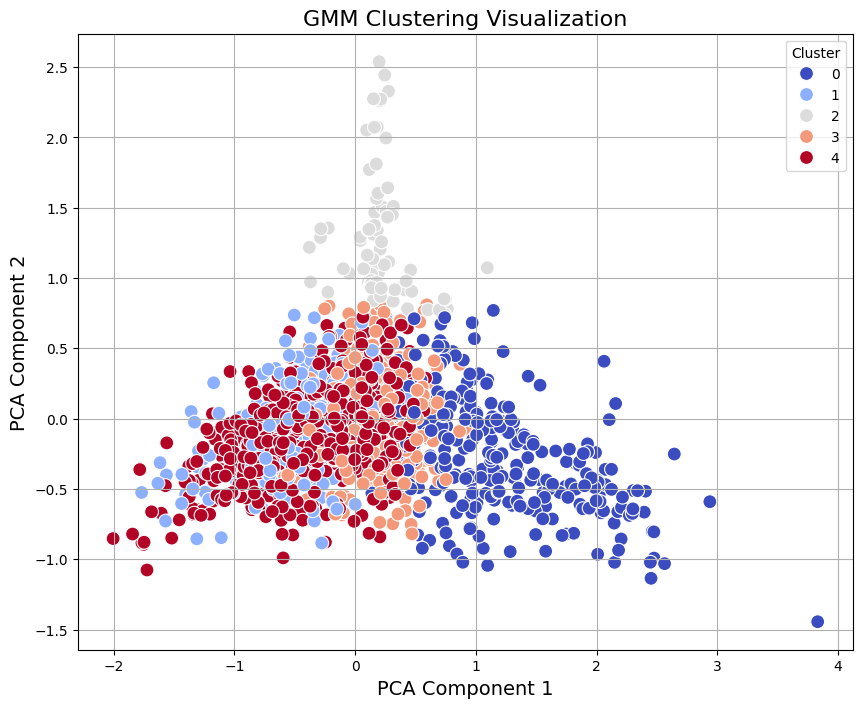

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_model = GaussianMixture(n_components=5, random_state=42)

gmm_clusters = gmm_model.fit_predict(doc_vectors_matrix)

silhouette_avg = silhouette_score(doc_vectors_matrix, gmm_clusters)
print(f'Silhouette Score (GMM): {silhouette_avg}')
pca = PCA(n_components=2)
doc_vectors_2d = pca.fit_transform(doc_vectors_matrix)

# Membuat plot scatter dari hasil klastering GMM
plt.figure(figsize=(10, 8))
sns.scatterplot(x=doc_vectors_2d[:, 0], y=doc_vectors_2d[:, 1], hue=gmm_clusters, palette='coolwarm', s=100)

# Tambahkan judul dan label
plt.title('GMM Clustering Visualization', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

#Spectral

Silhouette Score (Spectral): 0.2590449953808991


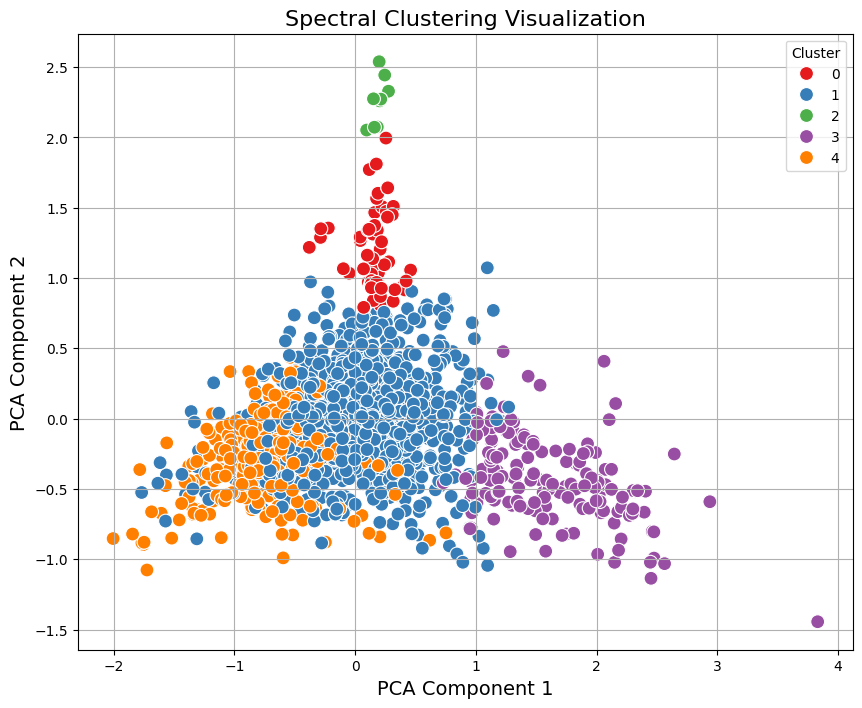

In [ ]:
from sklearn.cluster import SpectralClustering
spectral_model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
spectral_clusters = spectral_model.fit_predict(doc_vectors_matrix)
silhouette_avg = silhouette_score(doc_vectors_matrix, spectral_clusters)
print(f'Silhouette Score (Spectral): {silhouette_avg}')

pca = PCA(n_components=2)
doc_vectors_2d = pca.fit_transform(doc_vectors_matrix)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=doc_vectors_2d[:, 0], y=doc_vectors_2d[:, 1], hue=spectral_clusters, palette='Set1', s=100)
plt.title('Spectral Clustering Visualization', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Wordcloud setelah clustering

Word Cloud for Cluster 0


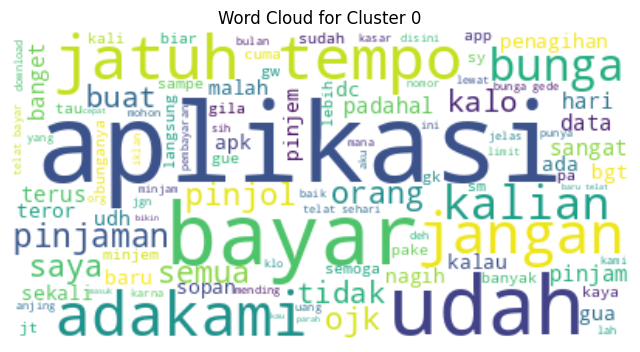


Top words for Cluster 0:
aplikasi: 608
bayar: 407
jangan: 342
udah: 324
telat: 312
bunga: 288
data: 272
tempo: 264
pinjam: 244
pinjaman: 236


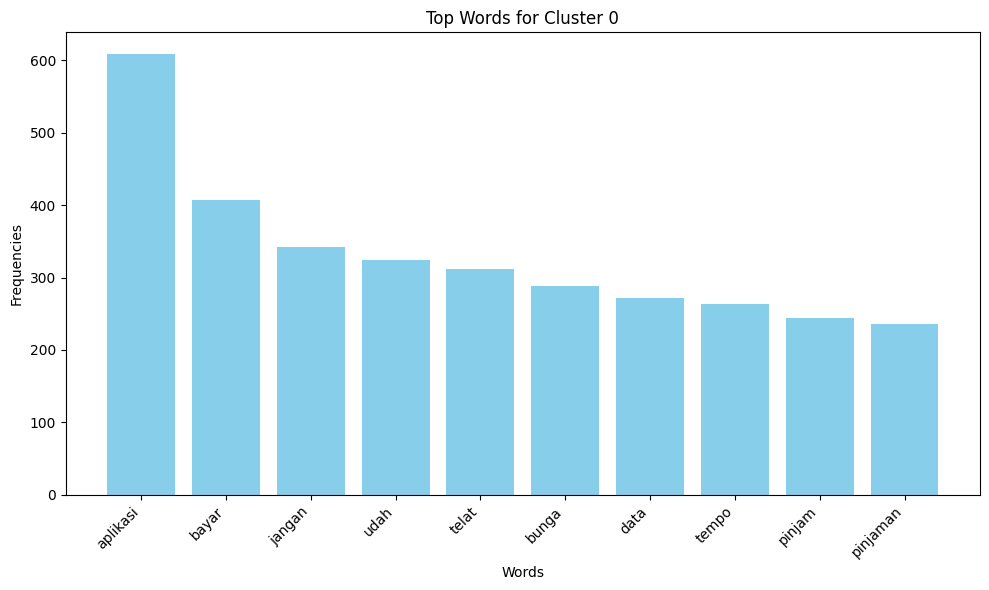

Word Cloud for Cluster 1


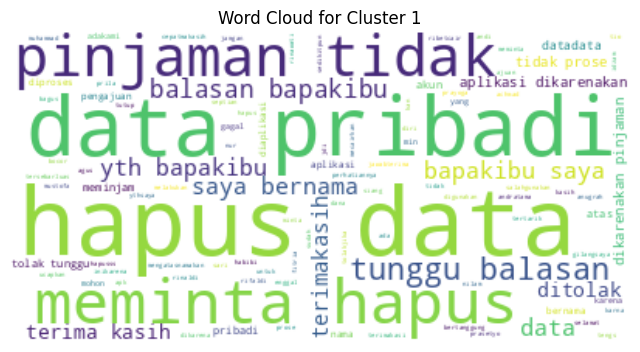


Top words for Cluster 1:
data: 31
hapus: 24
bapakibu: 19
tidak: 16
pribadi: 14
pinjaman: 11
saya: 11
bernama: 11
meminta: 11
aplikasi: 9


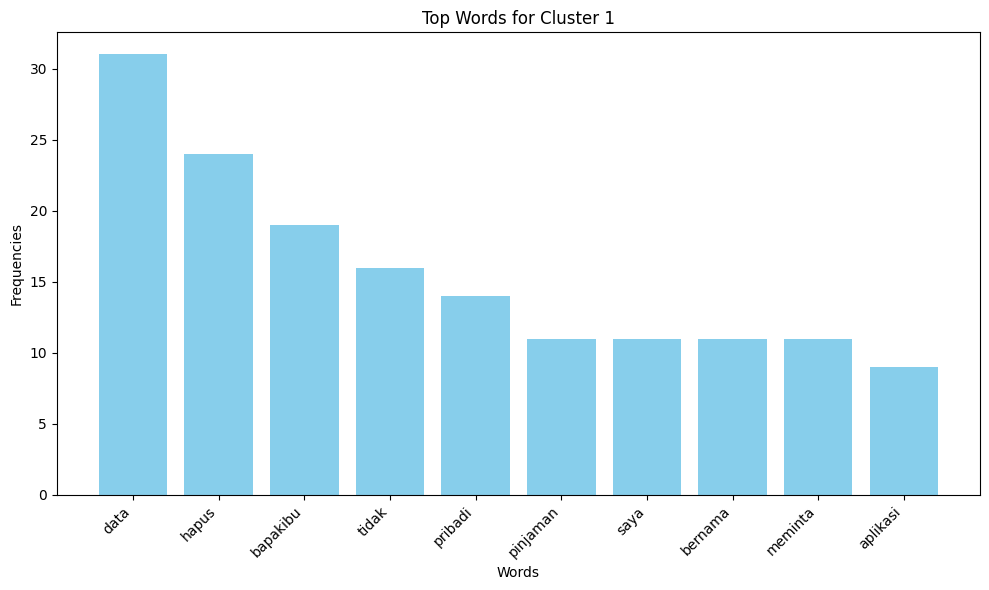

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_clusters = set(mean_shift_clusters)
clustered_docs = {cluster_id: [] for cluster_id in unique_clusters if cluster_id != -1}

for idx, cluster in enumerate(mean_shift_clusters):
    if cluster != -1:
        clustered_docs[cluster].append(' '.join(df['review'].iloc[idx]))

wordClouds = {}
top_words_per_cluster = {}

def generate_wordcloud(text_data, cluster_number):
    if not text_data:
        print(f'No text data available for Cluster {cluster_number}. Skipping word cloud generation.')
        return

    text = ' '.join(text_data)
    wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
    wordClouds[cluster_number] = wordcloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_number}')
    plt.axis('off')
    plt.show()

def plot_top_words_bar_chart(cluster_number, top_words):
    words = [word for word, freq in top_words]
    frequencies = [freq for word, freq in top_words]
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(f'Top Words for Cluster {cluster_number}')
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for cluster_num in clustered_docs.keys():
    print(f'Word Cloud for Cluster {cluster_num}')
    generate_wordcloud(clustered_docs[cluster_num], cluster_num)

    if clustered_docs[cluster_num]:  # Check if there are documents in the cluster
        word_frequencies = Counter(' '.join(clustered_docs[cluster_num]).split())
        top_words = word_frequencies.most_common(10)

        print(f'\nTop words for Cluster {cluster_num}:')
        for word, freq in top_words:
            print(f'{word}: {freq}')

        plot_top_words_bar_chart(cluster_num, top_words)
    else:
        print(f'No documents in Cluster {cluster_num}. Skipping top words plot.')


#TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['review'])


In [ ]:
num_clusters = 2
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(tfidf_matrix)
clusters = kmeans_model.labels_
silhouette_avg = silhouette_score(tfidf_matrix, clusters)
print(f'Silhouette Score (KMeans): {silhouette_avg}')

Silhouette Score (KMeans): 0.009624625083626291


Word Cloud for Cluster 0


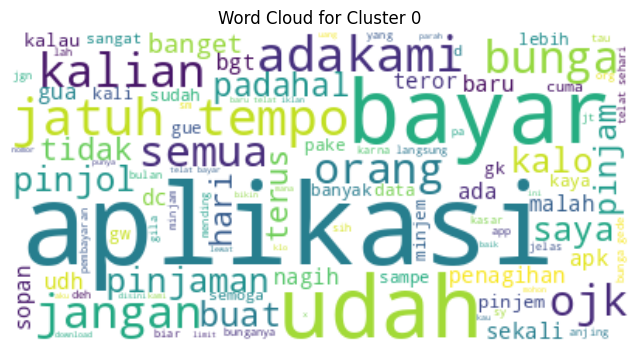


Top words for Cluster 0:
aplikasi: 599
bayar: 404
jangan: 340
udah: 324
telat: 310
data: 302
bunga: 277
tempo: 262
pinjam: 243
pinjaman: 242


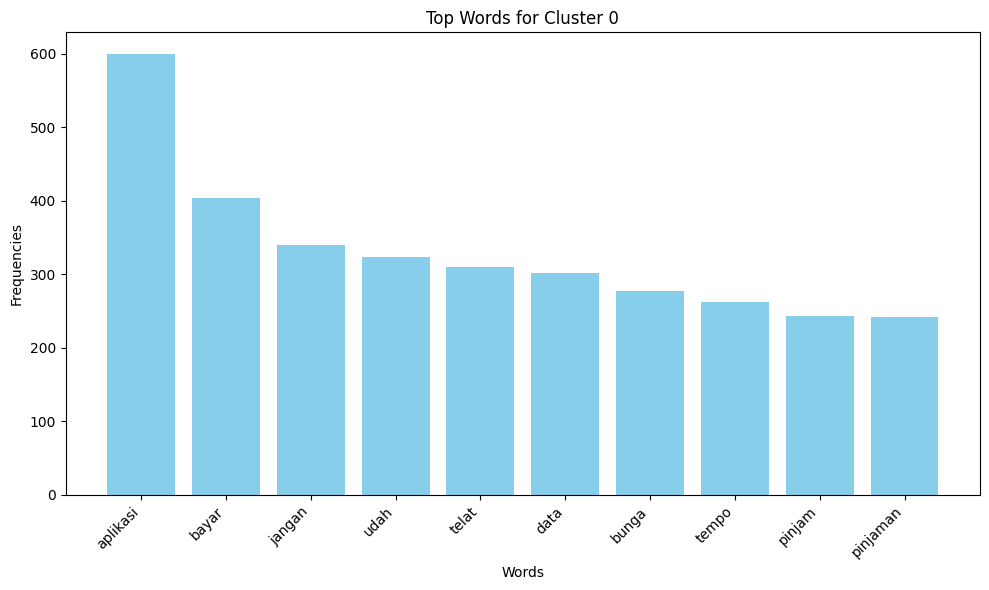

Word Cloud for Cluster 1


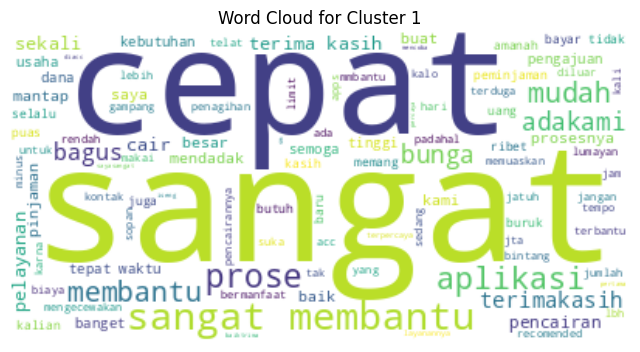


Top words for Cluster 1:
sangat: 102
cepat: 62
membantu: 46
prose: 21
aplikasi: 18
mudah: 14
bunga: 11
adakami: 11
bagus: 10
kasih: 10


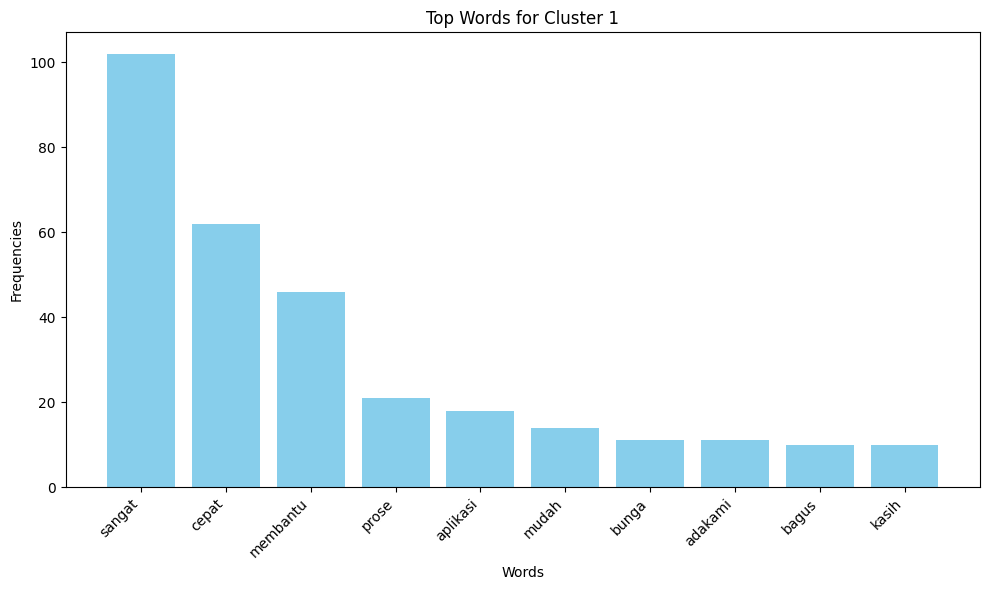

In [ ]:
clustered_docs = {i: [] for i in range(num_clusters)}

for idx, cluster in enumerate(clusters):
    clustered_docs[cluster].append(df['review'].iloc[idx])

wordClouds = {}
top_words_per_cluster = {}

def generate_wordcloud(text_data, cluster_number):
    if not text_data:
        print(f'No text data available for Cluster {cluster_number}. Skipping word cloud generation.')
        return

    text = ' '.join(text_data)
    wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
    wordClouds[cluster_number] = wordcloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_number}')
    plt.axis('off')
    plt.show()

def plot_top_words_bar_chart(cluster_number, top_words):
    words = [word for word, freq in top_words]
    frequencies = [freq for word, freq in top_words]
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(f'Top Words for Cluster {cluster_number}')
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for cluster_num in clustered_docs.keys():
    print(f'Word Cloud for Cluster {cluster_num}')
    generate_wordcloud(clustered_docs[cluster_num], cluster_num)

    if clustered_docs[cluster_num]:
        word_frequencies = Counter(' '.join(clustered_docs[cluster_num]).split())
        top_words = word_frequencies.most_common(10)

        print(f'\nTop words for Cluster {cluster_num}:')
        for word, freq in top_words:
            print(f'{word}: {freq}')

        plot_top_words_bar_chart(cluster_num, top_words)
    else:
        print(f'No documents in Cluster {cluster_num}. Skipping top words plot.')